In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as pyplot

%matplotlib inline

In [2]:
import imageio
import glob

In [3]:
class NeuralNetwork:
    
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        self.inputs = input_nodes
        self.hiddens = hidden_nodes
        self.outputs = output_nodes
        self.lr = learning_rate
        
        # 가중치 초기화
        self.wih = np.random.normal(0.0, pow(hidden_nodes,-0.5), (input_nodes, hidden_nodes)) # (in node X hiodden node) 가중치 행렬
        self.who = np.random.normal(0.0, pow(output_nodes,-0.5), (hidden_nodes, output_nodes))
        
        # 활성화 함수
        self.sigmoid = lambda x : sp.expit(x)
        
        pass
    
    def train(self, input_list, target_list):
        
        inputs = np.array(input_list, ndmin=2)
        targets = np.array(target_list, ndmin=2)
        
        hidden_input = np.dot(inputs, self.wih)
        hidden_output = self.sigmoid(hidden_input)
        
        final_input = np.dot(hidden_output, self.who)
        final_output = self.sigmoid(final_input)
        
        # 에러 값
        final_error = targets-final_output
        hidden_error = np.dot(final_error, np.transpose(self.who))
        
        #가중치 조정
        self.who += self.lr*np.dot(np.transpose(hidden_output),final_error*final_output*(1-final_output))  # O(j)*(t-0(k))*O(k)*(1-O(k))
        self.wih += self.lr*np.dot(inputs.T, hidden_error*hidden_output*(1-hidden_output))
        
        pass
    
    def query(self, input_list):
        
        inputs = np.array(input_list, ndmin=2)
        
        hidden_input = np.dot(inputs, self.wih)
        hidden_output = self.sigmoid(hidden_input)
        
        final_input = np.dot(hidden_output, self.who)
        final_output = self.sigmoid(final_input)
        
        return final_output

In [4]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
lr = 0.3

nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, lr)

In [5]:
train_set = open("dataset/train_60000.csv", 'r')
train_list = train_set.readlines()
train_set.close()

test_set = open("dataset/test_10000.csv", 'r')
test_list = test_set.readlines()
test_set.close()

In [6]:
input_nodes = 784
hidden_nodes = 300
output_nodes = 10
lr = 0.2

nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, lr)
for record in train_list:
        data_list = record.split(',')
        target_list = np.zeros(10)+0.01
        target_list[int(data_list[0])] = 0.99
        input_list =(np.asfarray(data_list[1:])/255*0.99)+0.01
        nn.train(input_list,target_list)
        pass  

In [7]:
score = []
for record in test_list:
    data_list = record.split(',')
    answer = int(data_list[0])
    input_list =(np.asfarray(data_list[1:])/255*0.99)+0.01
    output = nn.query(input_list)
    query_answer = np.argmax(output)
    if (query_answer == answer):
        score.append(1)
    else:
        score.append(0)
        pass
    pass 
score_array = np.array(score)
print(score_array.sum()/score_array.size)

0.9592


In [18]:
my_own_data = []
for img_name in glob.glob("dataset/number0-9/?.png"):
    
    label = int(img_name[-5:-4])
    img_array = imageio.imread(img_name, as_gray= True)
    img_data = 255.0-img_array
    record = np.append(label, img_data)
    my_own_data.append(record)

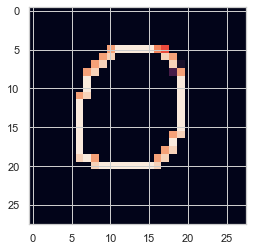

neural network answer : 0, number : 0.0


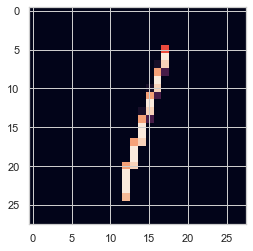

neural network answer : 1, number : 1.0


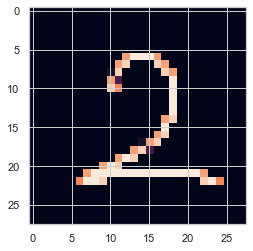

neural network answer : 2, number : 2.0


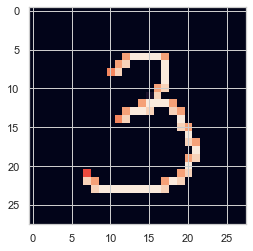

neural network answer : 3, number : 3.0


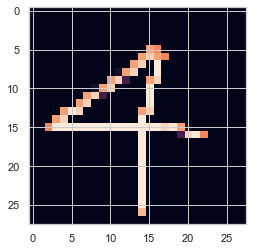

neural network answer : 9, number : 4.0


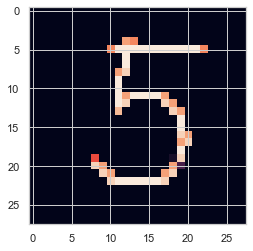

neural network answer : 5, number : 5.0


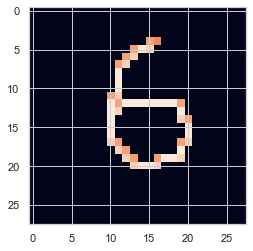

neural network answer : 6, number : 6.0


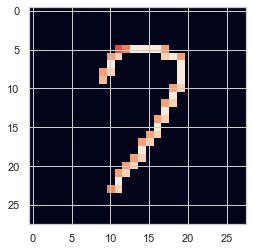

neural network answer : 2, number : 7.0


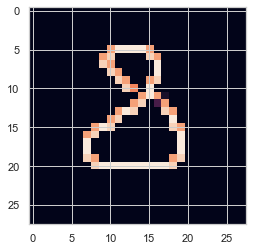

neural network answer : 3, number : 8.0


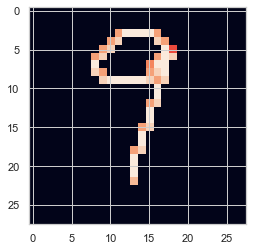

neural network answer : 7, number : 9.0


In [19]:
score = 0;
for record in my_own_data:
    pyplot.imshow(record[1:].reshape((28,28)))
    pyplot.show()
    input_data = (record[1:]/255.0*0.99)+0.01
    answer = nn.query(input_data)
    print(f'neural network answer : {np.argmax(answer)}, number : {record[0]}')
    if np.argmax(answer)==record[0]:
        score+=1
        pass
    pass


In [20]:
print(score)

6


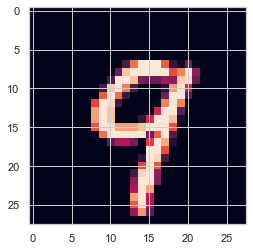

In [26]:
pyplot.imshow(np.asfarray(test_list[12].split(','))[1:].reshape((28,28)))

In [1]:
.imshow(np.asfarray(test_list[12].split(','))[1:].reshape((28,28)))

NameError: name 'pyplot' is not defined